In [1]:
# Import necessary libaries
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import lab2rgb
import numpy as np
from skimage import io

In [2]:
radius = 3 
n_points = 8 * radius

/home/ratan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


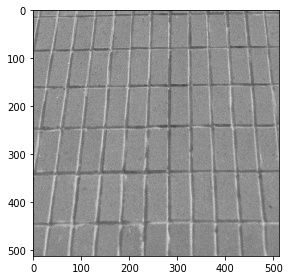

In [3]:
# Load brick
brick = data.load('brick.png')
# Display image
io.imshow(brick)
io.show()

/home/ratan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


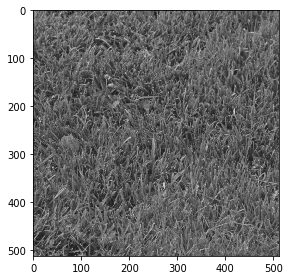

In [4]:
# Load grass
grass = data.load('grass.png')
# Display image
io.imshow(grass)
io.show()

/home/ratan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


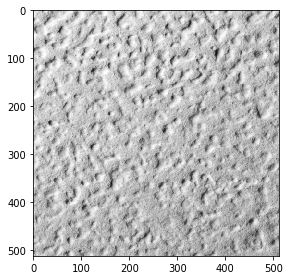

In [5]:
# Load wall
wall = data.load('rough-wall.png')
# Display image
io.imshow(wall)
io.show()

In [6]:
# Obtain lbp features of all images
brick_lbp = local_binary_pattern(brick, 16, 2, 'uniform')
grass_lbp = local_binary_pattern(grass, 16, 2, 'uniform')
wall_lbp = local_binary_pattern(wall, 16, 2, 'uniform')

In [7]:
# Rotate images
brick_rot = rotate(brick, angle=22, resize=False)
grass_rot = rotate(grass, angle=22, resize=False)
wall_rot = rotate(wall, angle=22, resize=False)

In [8]:
# Obtain lbp features of all rotated images
brick_rot_lbp = local_binary_pattern(brick_rot, 16, 2, 'uniform')
grass_rot_lbp = local_binary_pattern(grass_rot, 16, 2, 'uniform')
wall_rot_lbp = local_binary_pattern(wall_rot, 16, 2, 'uniform')

In [9]:
# Values for iteration
bins_num = int(brick_lbp.max() + 1)
brick_hist, _ = np.histogram(brick_lbp, normed = True, bins = bins_num, range=(0, bins_num))

lbp_features = [brick_rot_lbp, grass_rot_lbp, wall_rot_lbp]
min_score = 1000
idx = 0

In [10]:
# Run the iteration to match features
for feature in lbp_features:
    histogram, _ = np.histogram(feature, normed=True, bins= bins_num, range=(0, bins_num))
    p = np.asarray(brick_hist)
    q = np.asarray(histogram)
    filter_idx = np.where(np.logical_and(p != 0, q != 0))
    p_filtered = [p[i] for i in filter_idx]
    q_filtered = [q[i] for i in filter_idx]
    score = np.sum(p[filter_idx] * np.log2(p[filter_idx] / q[filter_idx]))
    if score < min_score:
        min_score = score
        winner = idx
    idx = idx + 1
    
if winner == 0:
    print('Brick matched with Brick Rotated')
elif winner == 1:
    print('Brick matched with Grass Rotated')
elif winner == 2:
    print('Brick matched with Grass Rotated')    

Brick matched with Brick Rotated
